In [40]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [41]:
#Load advertising data
ad_data = pd.read_csv("Resources/Advertising And Sales.csv")
ad_data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


In [42]:
#Calculating total budget for each ID
ad_data['Total Budget(in thousands)'] = ad_data['TV'] + ad_data['Radio'] + ad_data['Newspaper']

columns_order = ['ID', 'TV', 'Radio', 'Newspaper', 'Total Budget(in thousands)', 'Sales']
ad_data = ad_data[columns_order]
ad_data

,ID,TV,Radio,Newspaper,Total Budget(in thousands),Sales
0,1,230.1,37.8,69.2,337.1,22.1
1,2,44.5,39.3,45.1,128.9,10.4
2,3,17.2,45.9,69.3,132.4,9.3
3,4,151.5,41.3,58.5,251.3,18.5
4,5,180.8,12.8,58.4,252.0,12.9
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,55.7,7.6
196,197,94.2,4.9,8.1,107.2,9.7
197,198,177.0,11.0,6.4,194.4,12.8
198,199,283.6,42.0,66.2,391.8,25.5


In [43]:
#Rename columns and save new df
r_ad_data = ad_data.rename(columns={"ID": "Company ID",
                        "TV": "TV(Budget in thousands)",
                        "Radio": "Radio(Budget in thousands)",
                        "Newspaper": "Newspaper(Budget in thousands)",
                        "Sales": "Sales(in thousands of units)"})

r_ad_data
r_ad_data.to_csv('Resources/revised_advertising&sales.csv', index=False)

r_ad_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Company ID                      200 non-null    int64  
 1   TV(Budget in thousands)         200 non-null    float64
 2   Radio(Budget in thousands)      200 non-null    float64
 3   Newspaper(Budget in thousands)  200 non-null    float64
 4   Total Budget(in thousands)      200 non-null    float64
 5   Sales(in thousands of units)    200 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


In [44]:
#Finding the numerical summary for the dataframe
numerical_summary = r_ad_data.describe().transpose()
numerical_summary

,count,mean,std,min,25%,50%,75%,max
Company ID,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV(Budget in thousands),200.0,147.0325,85.885186,0.7,74.375,149.75,218.825,296.4
Radio(Budget in thousands),200.0,23.2895,14.869970,0.0,10.075,22.90,36.525,49.6
Newspaper(Budget in thousands),200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Total Budget(in thousands),200.0,200.8760,93.055503,11.7,123.550,207.35,281.125,433.6
Sales(in thousands of units),200.0,14.0380,5.209400,1.6,10.400,12.90,17.400,27.0


In [45]:
#Finding the max budget of each type of advertisment and creating new df
max_tv = r_ad_data.loc[r_ad_data['TV(Budget in thousands)'].idxmax()]

max_radio = r_ad_data.loc[r_ad_data['Radio(Budget in thousands)'].idxmax()]

max_newpaper = r_ad_data.loc[r_ad_data['Newspaper(Budget in thousands)'].idxmax()]

max_total = r_ad_data.loc[r_ad_data['Total Budget(in thousands)'].idxmax()]

max_sales = r_ad_data.loc[r_ad_data['Sales(in thousands of units)'].idxmax()]

max_df = pd.DataFrame({'Maxium Spending on TV Ads': max_tv,
                       'Maxium Spending on Radio Ads': max_radio,
                       'Maxium spending on Newspaper Ads': max_newpaper,
                       'Total Maxium Spending': max_total,
                       'Highest Sales Number': max_sales}
                       )

max_df

,Maxium Spending on TV Ads,Maxium Spending on Radio Ads,Maxium spending on Newspaper Ads,Total Maxium Spending,Highest Sales Number
Company ID,102.0,59.0,17.0,102.0,176.0
TV(Budget in thousands),296.4,210.8,67.8,296.4,276.9
Radio(Budget in thousands),36.3,49.6,36.6,36.3,48.9
Newspaper(Budget in thousands),100.9,37.7,114.0,100.9,41.8
Total Budget(in thousands),433.6,298.1,218.4,433.6,367.6
Sales(in thousands of units),23.8,23.8,12.5,23.8,27.0


In [46]:
x = pd.DataFrame(max_df.loc['Sales(in thousands of units)',:])

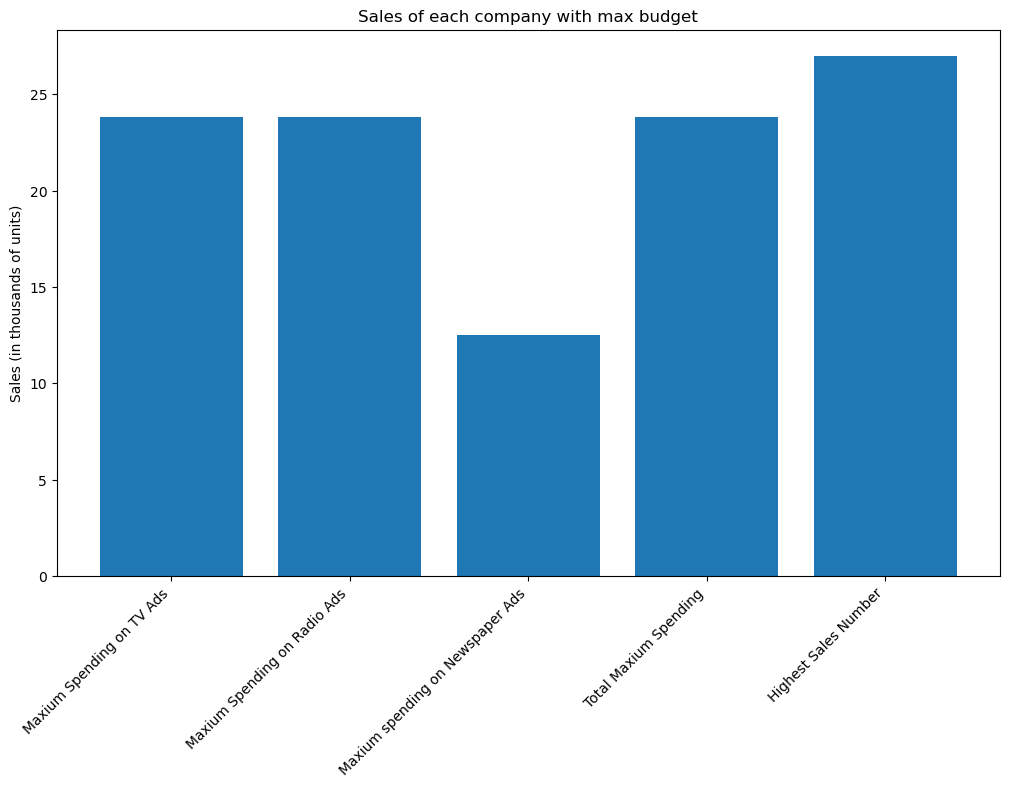

In [47]:
#Create a bar graph to display max spending
plt.figure(figsize=(10, 6))
plt.bar(x.index, x['Sales(in thousands of units)'])
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sales (in thousands of units)')
plt.title('Sales of each company with max budget')
plt.show()



Text(0, 0.5, 'Sales(in thousands)')

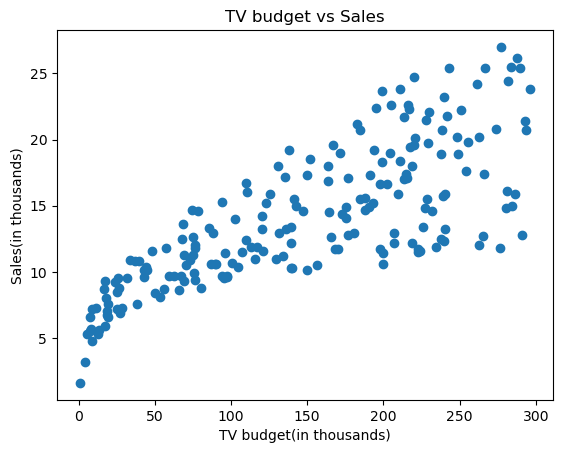

In [48]:
#Create variables for scatterplots
tv = ad_data['TV']
sales = ad_data['Sales']
total_budget = ad_data['Total Budget(in thousands)']
newspaper = ad_data['Newspaper']
radio = ad_data['Radio']

#Create scatterplot for tv
plt.scatter(tv, sales, marker="o")
plt.title('TV budget vs Sales')
plt.xlabel('TV budget(in thousands)')
plt.ylabel('Sales(in thousands)')

Text(0, 0.5, 'Sales(in thousands)')

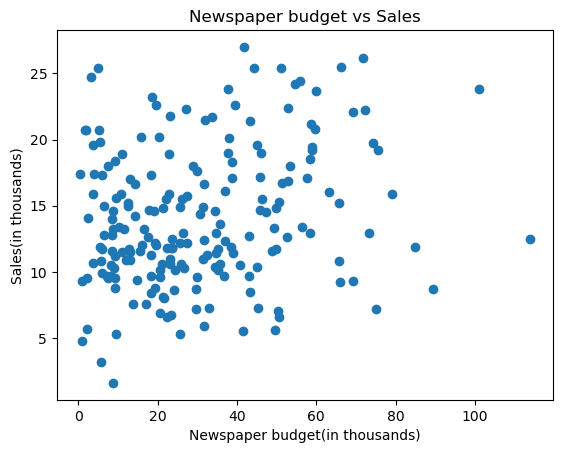

In [49]:
#Scatterplot for newpaper
plt.scatter(newspaper, sales, marker="o")
plt.title('Newspaper budget vs Sales')
plt.xlabel('Newspaper budget(in thousands)')
plt.ylabel('Sales(in thousands)')

Text(0, 0.5, 'Sales(in thousands)')

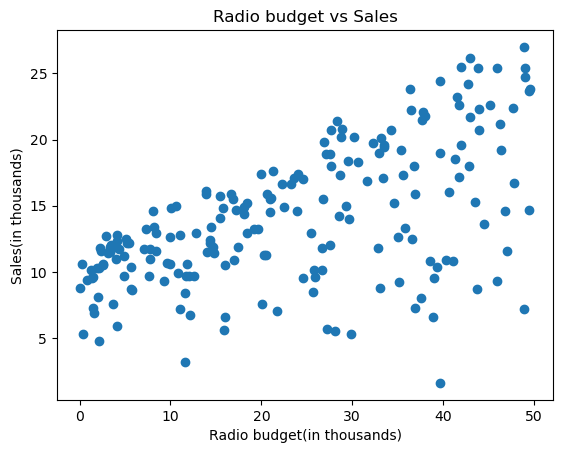

In [50]:
#Scatterplot for radio
plt.scatter(radio, sales, marker="o")
plt.title('Radio budget vs Sales')
plt.xlabel('Radio budget(in thousands)')
plt.ylabel('Sales(in thousands)')

Text(0, 0.5, 'Sales(in thousands)')

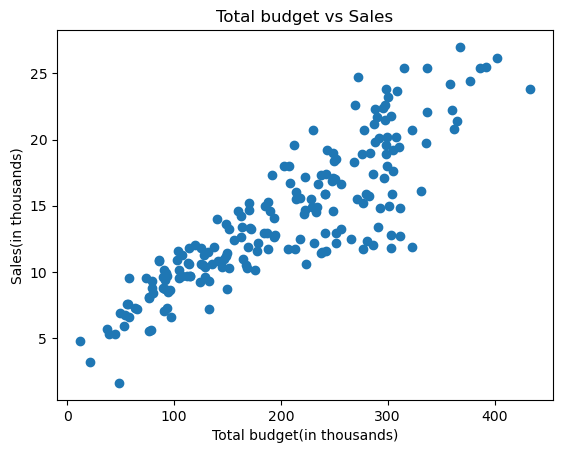

In [51]:
#Scatterplot for total budget
plt.scatter(total_budget, sales, marker="o")
plt.title('Total budget vs Sales')
plt.xlabel('Total budget(in thousands)')
plt.ylabel('Sales(in thousands)')

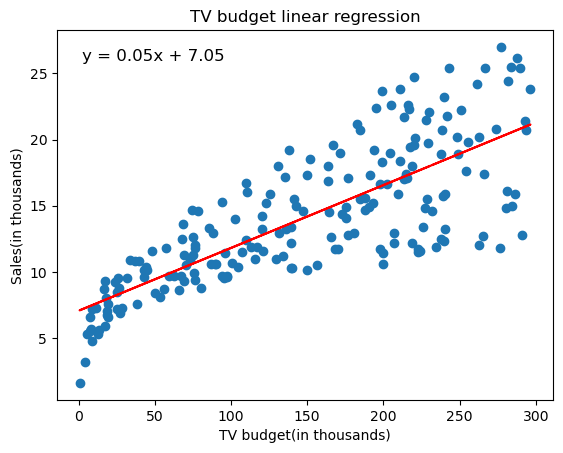

'y = 0.05x + 7.05'

In [52]:
#Create scatterplot with linear regression for each
x = tv
y = sales
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title('TV budget linear regression')
plt.xlabel('TV budget(in thousands)')
plt.ylabel('Sales(in thousands)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top')
plt.show()
line_eq

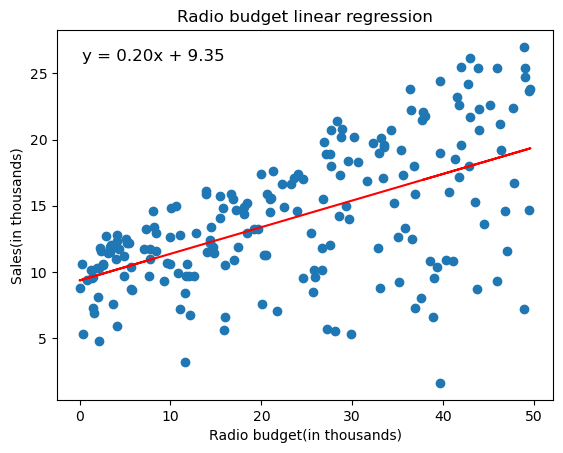

'y = 0.2x + 9.35'

In [53]:
z = radio
y = sales
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(z, y)
regress_values = z * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(z,y)
plt.plot(z,regress_values,"r-")
plt.title('Radio budget linear regression')
plt.xlabel('Radio budget(in thousands)')
plt.ylabel('Sales(in thousands)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top')
plt.show()
line_eq

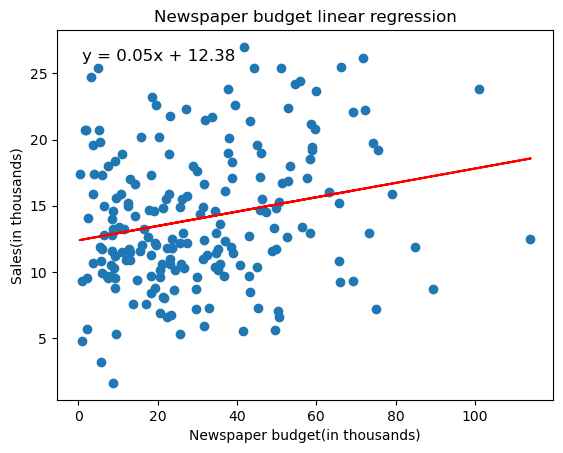

'y = 0.05x + 12.38'

In [54]:
v = newspaper
y = sales
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(v, y)
regress_values = v * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(v,y)
plt.plot(v,regress_values,"r-")
plt.title('Newspaper budget linear regression')
plt.xlabel('Newspaper budget(in thousands)')
plt.ylabel('Sales(in thousands)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top')
plt.show()
line_eq

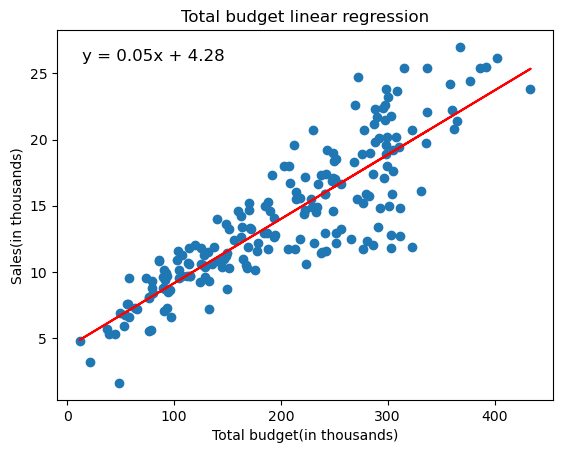

'y = 0.05x + 4.28'

In [55]:
t = total_budget
y = sales
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(t, y)
regress_values = t * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(t,y)
plt.plot(t,regress_values,"r-")
plt.title('Total budget linear regression')
plt.xlabel('Total budget(in thousands)')
plt.ylabel('Sales(in thousands)')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top')
plt.show()
line_eq

Text(0.5, 1.0, 'Advertising Spending Distribution')

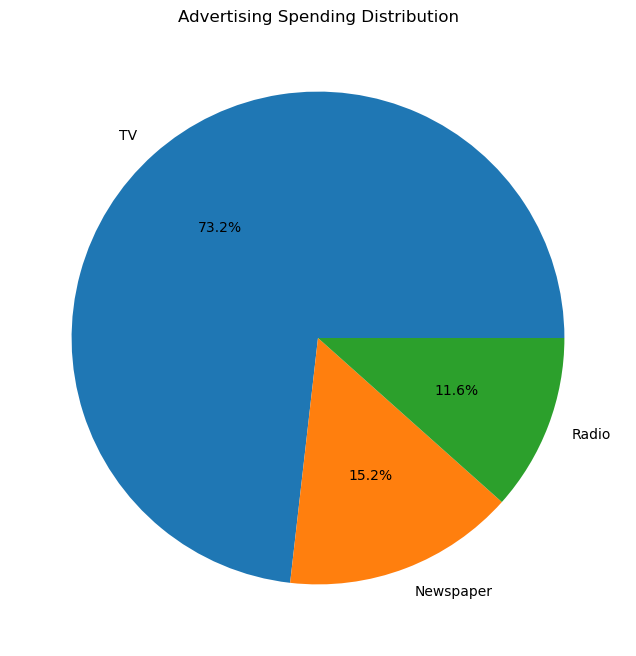

In [56]:
#Create a pie chart for for each advertisment type
ad_type = ['TV', 'Newspaper', 'Radio']
total_spending = ad_data[ad_type].sum()
plt.figure(figsize=(10,8))
plt.pie(total_spending, autopct='%1.1f%%', labels=ad_type)
plt.title('Advertising Spending Distribution')

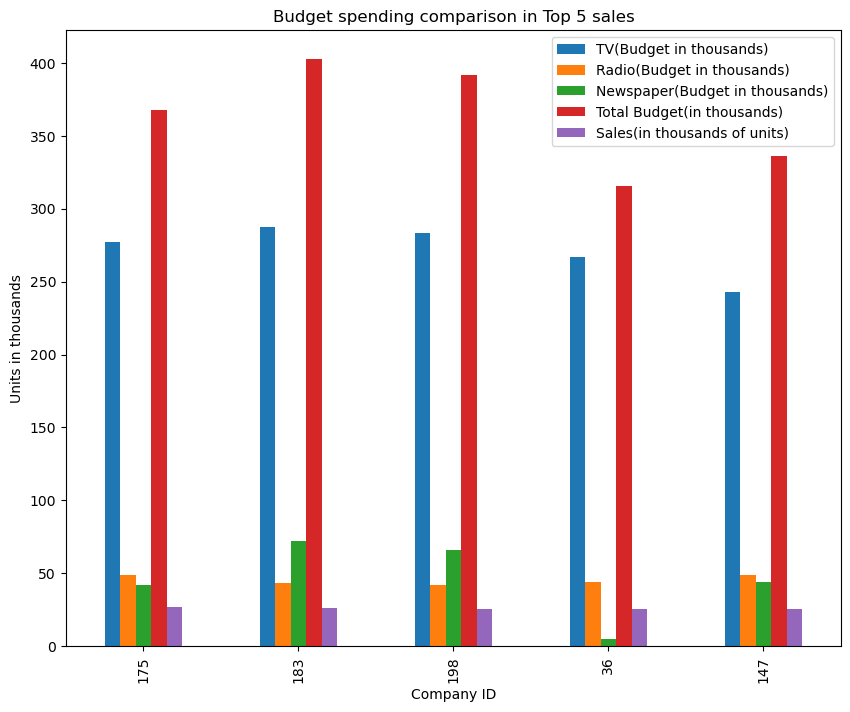

In [57]:
#Show top 5 and bottom 5 companies by sales
sales_df = r_ad_data.sort_values('Sales(in thousands of units)', ascending=False)
sales_df = sales_df[["TV(Budget in thousands)", "Radio(Budget in thousands)", "Newspaper(Budget in thousands)",
                     "Total Budget(in thousands)", "Sales(in thousands of units)"]]

top_5 = sales_df.head(5)
bottom_5 = sales_df.tail(5)

figure1 = top_5.plot(kind="bar",figsize=(10,8),
                                   title="Budget spending comparison in Top 5 sales",
                                   xlabel="Company ID",
                                   ylabel="Units in thousands")

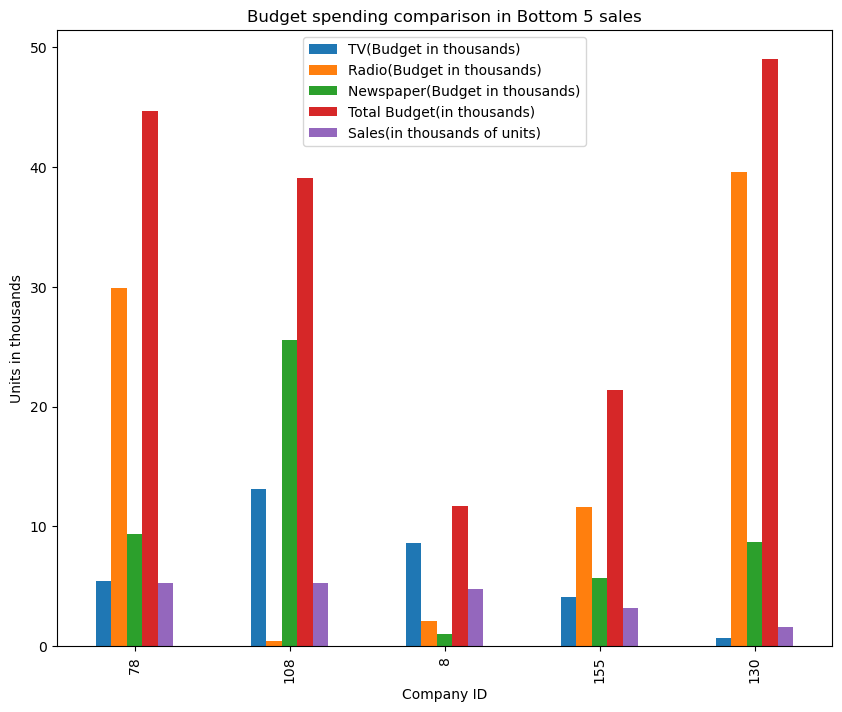

In [58]:
figure2 = bottom_5.plot(kind="bar",figsize=(10,8),
                                   title="Budget spending comparison in Bottom 5 sales",
                                   xlabel="Company ID",
                                   ylabel="Units in thousands")